In [3]:
# ==============================
# 1. Import Libraries
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Make plots look better
sns.set(style="whitegrid")

In [4]:
# ==============================
# 2. Generate Synthetic Dataset
# ==============================
np.random.seed(42)
n_customers = 1000

data = pd.DataFrame({
    'CustomerID': np.arange(1, n_customers+1),
    'Age': np.random.randint(18, 70, n_customers),
    'Recency': np.random.randint(1, 365, n_customers),       # Days since last purchase
    'Frequency': np.random.randint(1, 50, n_customers),      # Purchases per year
    'Monetary': np.random.randint(100, 10000, n_customers),  # Total spend
    'Tenure': np.random.randint(30, 2000, n_customers),      # Days as a customer
    'PreferredChannel': np.random.choice(['Online','Offline'], n_customers)
})

data.head()

,CustomerID,Age,Recency,Frequency,Monetary,Tenure,PreferredChannel
0,1,56,227,21,7562,1565,Online
1,2,69,15,31,5205,1209,Offline
2,3,46,192,24,3078,1991,Offline
3,4,32,119,20,2939,1308,Offline
4,5,60,28,37,3484,200,Offline


Shape of Data: (1000, 7)

Missing Values:
 CustomerID          0
Age                 0
Recency             0
Frequency           0
Monetary            0
Tenure              0
PreferredChannel    0
dtype: int64

Summary Stats:
         CustomerID         Age    Recency    Frequency    Monetary  \
count  1000.000000  1000.00000  1000.0000  1000.000000  1000.00000   
mean    500.500000    43.81900   181.3200    24.795000  5025.63100   
std     288.819436    14.99103   107.5898    14.170101  2834.91616   
min       1.000000    18.00000     1.0000     1.000000   106.00000   
25%     250.750000    31.00000    87.7500    13.000000  2458.75000   
50%     500.500000    44.00000   179.0000    24.000000  5145.50000   
75%     750.250000    56.00000   280.2500    37.000000  7375.50000   
max    1000.000000    69.00000   364.0000    49.000000  9990.00000   

            Tenure  
count  1000.000000  
mean   1002.094000  
std     570.062857  
min      32.000000  
25%     514.000000  
50%     976.0000

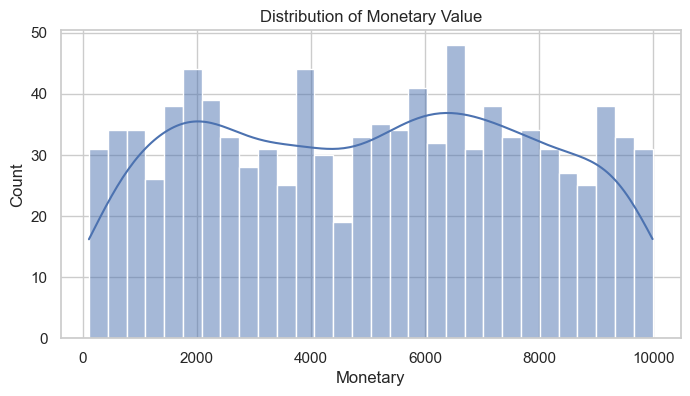

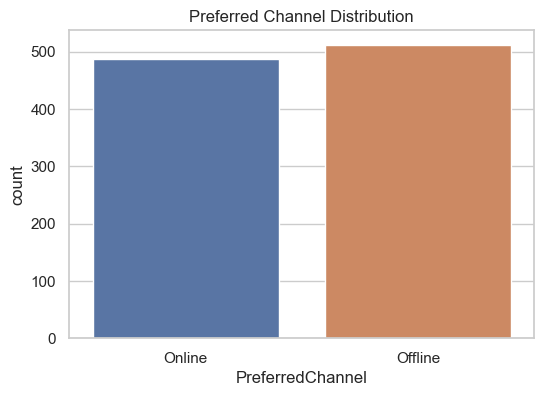

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


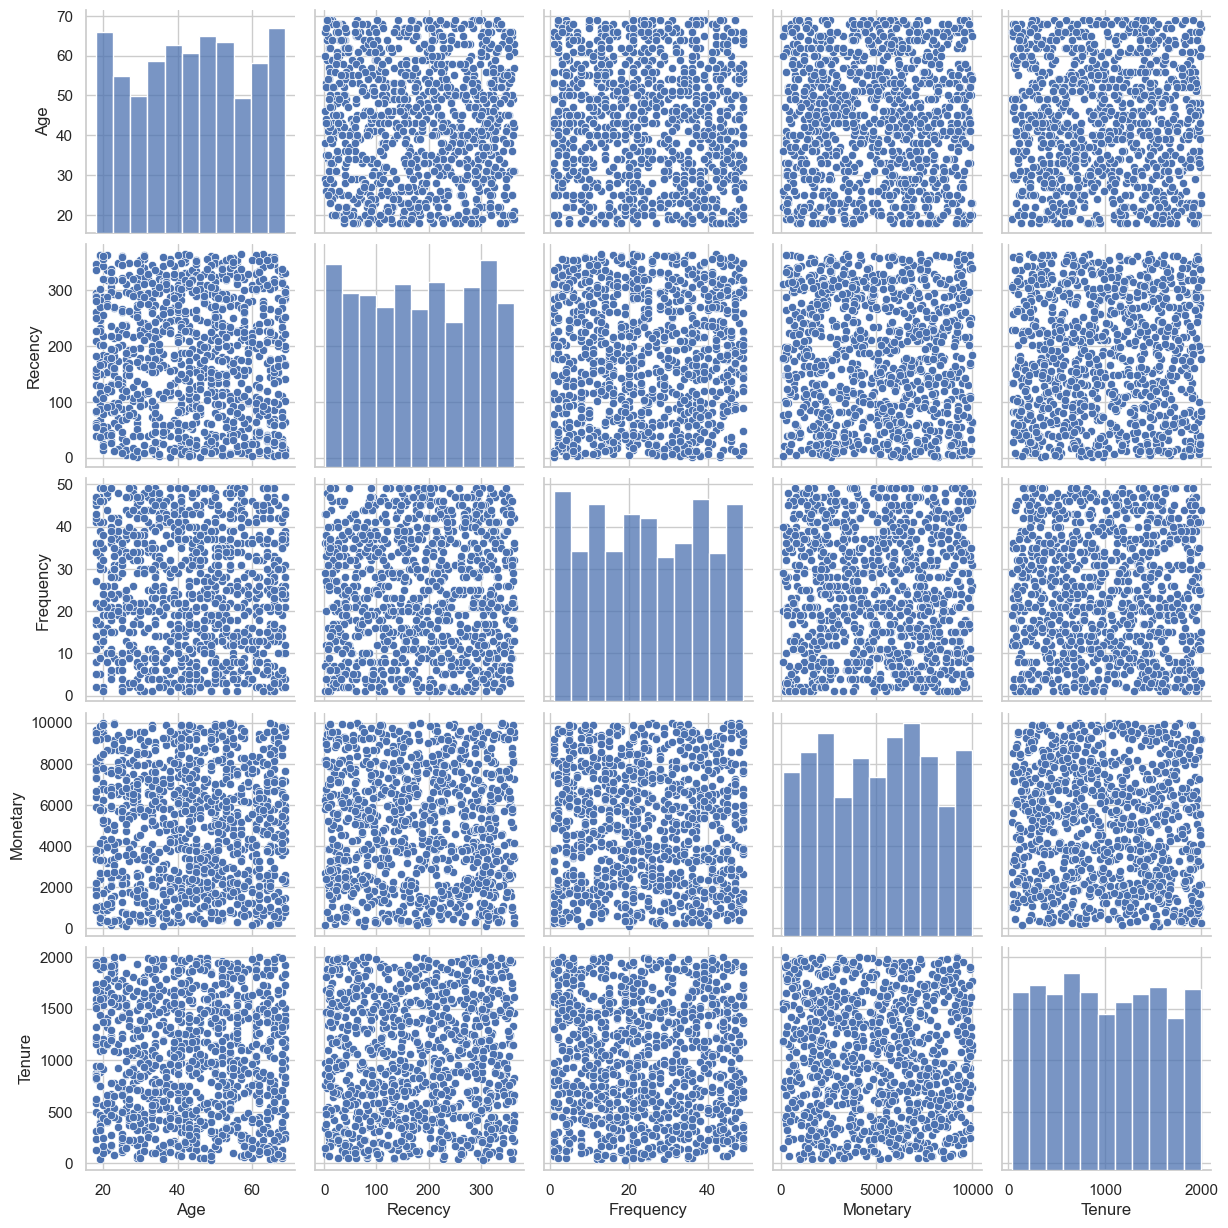

In [5]:
# ==============================
# 3. Exploratory Data Analysis (EDA)
# ==============================
print("Shape of Data:", data.shape)
print("\nMissing Values:\n", data.isnull().sum())
print("\nSummary Stats:\n", data.describe())

# Plot distributions
plt.figure(figsize=(8,4))
sns.histplot(data['Monetary'], bins=30, kde=True)
plt.title("Distribution of Monetary Value")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='PreferredChannel', data=data)
plt.title("Preferred Channel Distribution")
plt.show()

# Pairplot (only numeric)
sns.pairplot(data[['Age','Recency','Frequency','Monetary','Tenure']])
plt.show()

In [6]:
# ==============================
# 4. Preprocessing (Encoding + Scaling)
# ==============================
# Encode Categorical Variable
data['ChannelCode'] = data['PreferredChannel'].map({'Offline':0,'Online':1})

# Features for clustering
features = ['Age','Recency','Frequency','Monetary','Tenure','ChannelCode']

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

scaled_features[:5]


array([[ 0.81295917,  0.42478801, -0.26795143,  0.89513693,  0.98793959,
         1.02429504],
       [ 1.68057836, -1.54664496,  0.43811295,  0.06330302,  0.36313457,
        -0.97628121],
       [ 0.1455598 ,  0.09931559, -0.05613212, -0.68735914,  1.73559953,
        -0.97628121],
       [-0.78879932, -0.5795269 , -0.33855787, -0.73641511,  0.53688653,
        -0.97628121],
       [ 1.07991892, -1.4257552 ,  0.86175158, -0.54407337, -1.40773134,
        -0.97628121]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

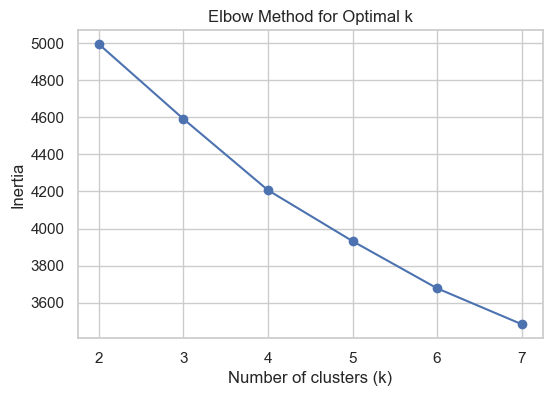

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,CustomerID,Age,Recency,Frequency,Monetary,Tenure,PreferredChannel,ChannelCode,Cluster,Segment
0,1,56,227,21,7562,1565,Online,1,1,Frequent Buyers
1,2,69,15,31,5205,1209,Offline,0,0,Frequent Buyers
2,3,46,192,24,3078,1991,Offline,0,3,Frequent Buyers
3,4,32,119,20,2939,1308,Offline,0,0,Occasional Shoppers
4,5,60,28,37,3484,200,Offline,0,3,Frequent Buyers


In [13]:
# ==============================
# 5. Model Building (KMeans Clustering)
# ==============================

# Find optimal k using Elbow Method
inertia = []
K = range(2,8)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose k=4 (based on elbow)
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

data.head()


In [8]:
# ==============================
# 6. Cluster Profiling & Naming
# ==============================
cluster_summary = data.groupby('Cluster')[['Age','Recency','Frequency','Monetary','Tenure']].mean().round(1)
print("Cluster Summary:\n", cluster_summary)

# Segment Naming Function
def name_segment(row):
    if row['Monetary'] > 6000 and row['Frequency'] > 25:
        return "VIP High Spenders"
    elif row['Recency'] > 200 and row['Frequency'] < 10:
        return "At Risk"
    elif row['Frequency'] > 20:
        return "Frequent Buyers"
    else:
        return "Occasional Shoppers"

data['Segment'] = data.apply(name_segment, axis=1)

data[['CustomerID','Cluster','Segment']].head()


Cluster Summary:
           Age  Recency  Frequency  Monetary  Tenure
Cluster                                            
0        45.4    150.1       13.3    5107.6   973.5
1        45.0    203.9       24.6    4636.6  1484.5
2        44.2    162.7       25.6    5618.5   517.7
3        40.5    210.8       36.6    4742.8  1027.1


,CustomerID,Cluster,Segment
0,1,1,Frequent Buyers
1,2,0,Frequent Buyers
2,3,3,Frequent Buyers
3,4,0,Occasional Shoppers
4,5,3,Frequent Buyers


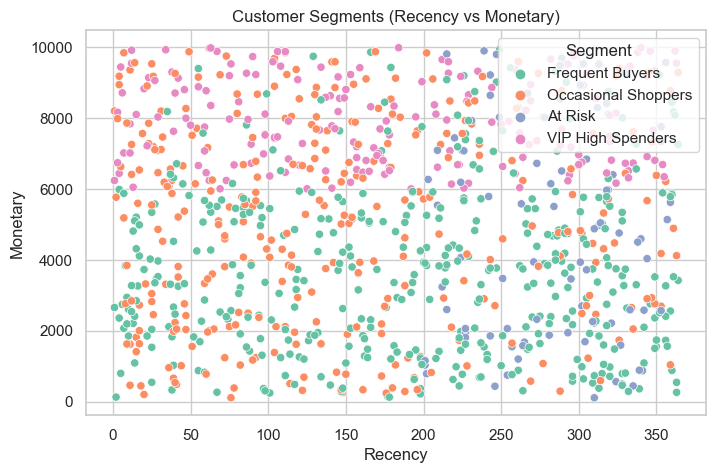

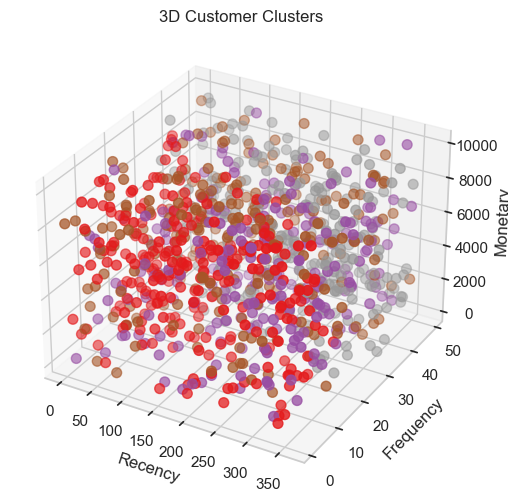

In [9]:
# ==============================
# 7. Visualizations (2D and 3D)
# ==============================
# 2D Scatter (Recency vs Monetary)
plt.figure(figsize=(8,5))
sns.scatterplot(x='Recency', y='Monetary', hue='Segment', data=data, palette='Set2')
plt.title("Customer Segments (Recency vs Monetary)")
plt.show()

# 3D Scatter (Recency, Frequency, Monetary)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Recency'], data['Frequency'], data['Monetary'],
           c=data['Cluster'], cmap='Set1', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title("3D Customer Clusters")
plt.show()


In [10]:
# ==============================
# 8. Save Final Segmented Dataset
# ==============================
data.to_csv('segmented_customers.csv', index=False)
print("Segmented customer data saved as segmented_customers.csv")


Segmented customer data saved as segmented_customers.csv
